# SA-2022 WEEK 3 GRADED ASSIGNMENT

> Spaceship Titanic

Predict which passengers are transported to an alternate dimension

![](https://www.gannett-cdn.com/-mm-/682bf77435754aee88576469063388a7d8b07c2a/c=0-150-1280-873/local/-/media/2017/02/01/Reno/RGJ/636215634914521096-image001.jpg?width=660&height=373&fit=crop&format=pjpg&auto=webp)


### <b>Description</b>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

### <b>Data description</b>

- Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- <code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- <code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.
- <code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- <code>Cabin</code> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- <code>Destination</code> - The planet the passenger will be debarking to.
- <code>Age</code> - The age of the passenger.
- <code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.
- <code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- <code>Name</code> - The first and last names of the passenger.
- <code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


### <b>Algorithm Documentation</b> 
- <code>Logistic Regression</code> : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- <code>SVM</code> : https://scikit-learn.org/stable/modules/svm.html
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- <code>Plot Confusion Matrix</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- <code>ROC_AUC Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
- <code>Classification Report</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- <code>Label Encoder</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- <code>Label Binarizer</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
- <code>Standard Scaler</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- <code>Cross Val Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# Installing Required Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Read the data

In [2]:
df = pd.read_csv("data.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,Andromeda,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,Andromeda,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,Andromeda,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,Andromeda,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,Andromeda,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### Check the shape of data. It should be  (8693, 14)

In [3]:
df.shape

(8693, 14)

#### Apply describe on dataframe

In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Check if there any null value in the dataset.

In [5]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

#### Number continuous and categorical features

In [6]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [8]:
continous_features = [feature for feature in df.columns if df[feature].dtypes != 'O'] # Fill the continuous fearures inside the array
categorical_features = [feature for feature in df.columns if df[feature].dtypes =='O'] # Fill the categorical features inside the array

print("Continous Features: ", continous_features)
print("No. of Continuous features: ", len(continous_features))

print("Categorical Features: ", categorical_features)
print("No. of Categorical Features: ", len(categorical_features))

Continous Features:  ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
No. of Continuous features:  9
Categorical Features:  ['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name']
No. of Categorical Features:  5


#### Unique values

In [9]:
# Print the number of unique values of the categorical features

for feature in categorical_features:
    print("Number of unique values in",feature,': ',df[feature].nunique())

Number of unique values in PassengerId :  8693
Number of unique values in HomePlanet :  3
Number of unique values in Cabin :  6560
Number of unique values in Destination :  3
Number of unique values in Name :  8473


In [10]:
df.VIP.nunique()

2

<code>Note: If we apply one-hot-encoding to a categorical feature with many unique values, </code>
- Number of columns will be high
- Time required for training a model will be high
- We may not get usefull insights about the data

<code>This is the reason we are droping the features with more unique values.</code>


#### Drop the features

In [11]:
# Drop those categorical features which have more than 25 unique values
df.drop(columns=['PassengerId','Cabin','Name'],inplace=True)

df.shape


(8693, 11)

#### One Hot Encoding

In [12]:
df=pd.get_dummies(df)
df.shape
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,1,0,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0,1,0,0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,1,0,0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,1,0,0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0,1,0,0


#### Changing bool columns to 0,1

In [13]:
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,0,0


#### Split the data into train and test

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Transported'])
y = df.loc[:,'Transported']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15,random_state = 2022)

In [15]:
print("X_train:", X_train.shape) # X_train
print("X_test:", X_test.shape) # X_test
print("y_train:", y_train.shape) # y_train
print("y_test:", y_test.shape) # y_test

X_train: (7389, 14)
X_test: (1304, 14)
y_train: (7389,)
y_test: (1304,)


#### Scale the data using Standard Scaler

In [16]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
8592,0,54.0,0,724.0,25.0,71.0,0.0,1054.0,1,0,0,1,0,0
2581,0,36.0,0,123.0,3.0,0.0,7.0,0.0,1,0,0,1,0,0
6596,0,35.0,0,0.0,71.0,631.0,0.0,0.0,1,0,0,0,0,1
3250,0,29.0,0,4.0,3439.0,0.0,0.0,0.0,0,1,0,1,0,0
6224,0,53.0,0,0.0,2606.0,0.0,1170.0,0.0,0,1,0,0,0,1


In [17]:
## Use Standard Scaler to scale the train and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## <b>Logistic Regression</b>
#### Use default parameters unless mentioned

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state= 2021 )
logreg.fit(X_train,y_train)

LogisticRegression(random_state=2021)

In [19]:
y_pred = logreg.predict(X_test)

#### Plot confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[512, 125],
       [143, 524]], dtype=int64)

#### Print classification report

In [22]:
matrix_classification = classification_report(y_test,y_pred)
print(matrix_classification)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       637
           1       0.81      0.79      0.80       667

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304



#### Print accuracy score

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7944785276073619

#### Print ROC-AUC score

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
pob = logreg.predict_proba(X_test)
score = roc_auc_score(y_test,pob[:,1])
score

0.877197978718647

#### Plot ROC-AUC Curve

Text(0.5, 1.0, 'Logistic Regression ROC curve')

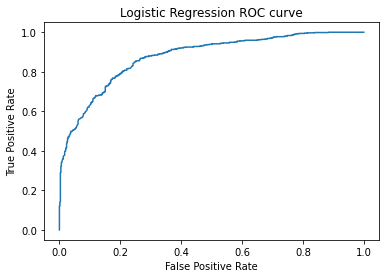

In [25]:
fpr, tpr, thresh = roc_curve(y_test,pob[:,1])
plt.plot(fpr,tpr,label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC curve")

#### Cross validation

In [26]:
X = df.drop(columns=['Transported'])
y = df.loc[:,'Transported']

In [27]:
crossval_scores = cross_val_score(LogisticRegression(), X, y, scoring='roc_auc', cv=5)
crossval_scores.mean()

0.8707122927877162

## <b>SVM</b>
#### Use default parameters unless mentioned

In [28]:
from sklearn import svm
sv = svm.SVC(random_state = 2022, C=5, gamma='scale', kernel='rbf', probability=True)
sv.fit(X_train,y_train)

SVC(C=5, probability=True, random_state=2022)

In [29]:
y_pred_svm = sv.predict(X_test)

#### Plot confusion matrix

In [30]:
matrix = confusion_matrix(y_test,y_pred_svm)
matrix

array([[506, 131],
       [124, 543]], dtype=int64)

#### Print classification report

In [31]:
matrix_classification = classification_report(y_test,y_pred_svm)
print(matrix_classification)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       637
           1       0.81      0.81      0.81       667

    accuracy                           0.80      1304
   macro avg       0.80      0.80      0.80      1304
weighted avg       0.80      0.80      0.80      1304



#### Print accuracy score

In [32]:
accuracy_score(y_test,y_pred_svm)

0.8044478527607362

#### Print ROC-AUC score

In [36]:
pob = logreg.predict_proba(X_test)
score = roc_auc_score(y_test,pob[:,1])
score

0.877197978718647

#### Plot ROC-AUC curve

Text(0.5, 1.0, 'SVM ROC curve')

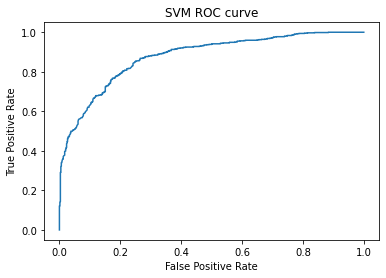

In [34]:
fpr2, tpr2, thresh = roc_curve(y_test,pob[:,1])
plt.plot(fpr,tpr,label = "SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC curve")

# Conclusion

## Logistic Regression
1. Accuracy score: 0.7944785276073619
2. ROC-AUC score: 0.877197978718647

## SVM
1. Accuracy score: 0.8044478527607362
2. ROC-AUC score: 0.877197978718647

Logistic Regression has more accuracy score